# Form factor 1D functions with resolution and wedge cut

In [1]:
#include "FormFactor_resolution_add_wedge_1D.h"
#include "FormFactor_t_1D.h"

### These are the parameters for all functions below

In [2]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7;
double q_min = 0, q_max = 0.5, t_min = 0, t_max = 0.25;
double qy_min = 0, qy_max = 0.5, qx_prime_min = 0, qx_prime_max = 0.5;
double ty_min = 0, ty_max = 0.25, tx_min = 0, tx_max = 0.25, tx_prime_min = 0, tx_prime_max = 0.25, bins = 1000; 
double x_min = 0, x_max = 15, y_min = 0, y_max = 15, r_min = 0, r_max = 15;
double phi_min = 0, phi_max = pi/9, sigma = 0.1;

// Initialize constructors
FormFactor_resolution_add_wedge_1D ff_add_cut(A,Vo,R,a0,t_min,t_max,bins,phi_min,phi_max,sigma,r_min,r_max);
FormFactor_t_1D ff_1d(A,Vo,R,a0,t_min,t_max,bins,r_min,r_max);

### Compare true form factor with smeared form factor TF1

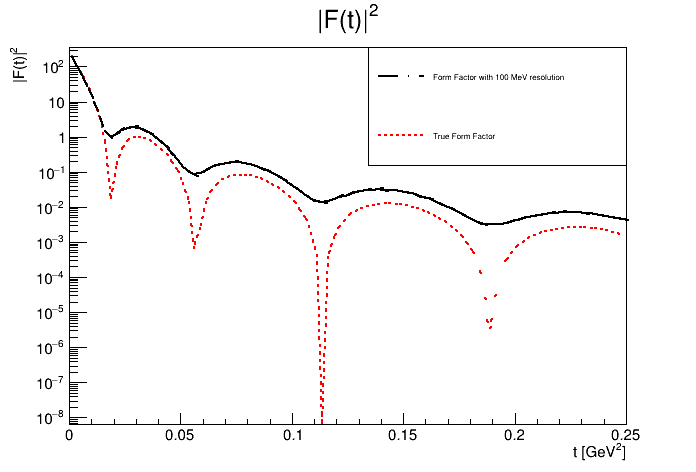

In [8]:
TF1 *trueff_1d = ff_1d.getFormFactort_1D();
    double trueFFIntegral = trueff_1d->Integral(trueff_1d->GetXmin(), trueff_1d->GetXmax());
    TF1 *trueFF = new TF1("", [trueff_1d, trueFFIntegral](double *x, double *par) 
    {
        return trueff_1d->Eval(x[0]) / trueFFIntegral;
    }, trueff_1d->GetXmin(), trueff_1d->GetXmax(), 0);
    trueFF->SetTitle("|F(t)|^{2}");
    trueFF->GetYaxis()->SetTitle("|F(t)|^{2}");
    trueFF->GetXaxis()->SetTitle("t [GeV^{2}]");
    trueFF->SetLineColor(kRed);
    trueFF->SetLineStyle(2);
    trueFF->Draw();

TF1 *FF_wCutRes_1d = ff_add_cut.getWedgeRes_fun_1D();
    double trueFFwResIntegral = FF_wCutRes_1d->Integral(FF_wCutRes_1d->GetXmin(), FF_wCutRes_1d->GetXmax());
    TF1 *FF_wCutRes = new TF1("", [FF_wCutRes_1d, trueFFwResIntegral](double *x, double *par) 
    {
        return FF_wCutRes_1d->Eval(x[0]) / trueFFwResIntegral;
    }, FF_wCutRes_1d->GetXmin(), FF_wCutRes_1d->GetXmax(), 0);
    FF_wCutRes->SetLineColor(kBlack);
    FF_wCutRes->SetLineStyle(10);
    FF_wCutRes->Draw("same");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
	legend->AddEntry(FF_wCutRes,"Form Factor with 100 MeV resolution","l");
    legend->AddEntry(trueFF,"True Form Factor","l");
    legend->Draw();

gPad->SetLogy(1);
c1->Draw();

### Compare true form factor with smeared form factor histogram

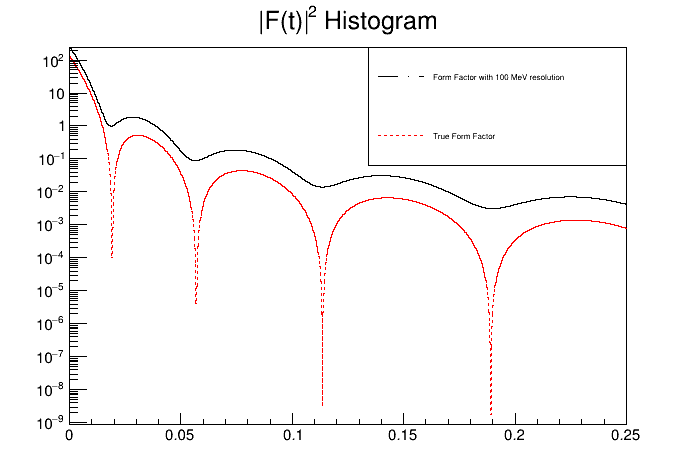

In [5]:
TH1D *trueFF_hist2 = ff_1d.getFF_hist();
    //trueFF_hist2->Scale(197./trueFF_hist2->Integral(), "width");
    trueFF_hist2->SetTitle("|F(t)|^{2} Histogram");
    trueFF_hist2->SetLineColor(kRed);
    trueFF_hist2->SetLineStyle(2);
    trueFF_hist2->Draw();

TH1D *FF_wCutRes_hist = ff_add_cut.getWedgeRes_hist_1D();
    FF_wCutRes_hist->Scale(1/FF_wCutRes_hist->Integral(), "width");
    FF_wCutRes_hist->SetLineColor(kBlack);
    FF_wCutRes_hist->SetLineStyle(10);
    FF_wCutRes_hist->Draw("same");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
	legend->AddEntry(FF_wCutRes_hist,"Form Factor with 100 MeV resolution","l");
    legend->AddEntry(trueFF_hist2,"True Form Factor","l");
    legend->Draw();

gPad->SetLogy(1);
gStyle->SetOptStat(0);
c1->Draw();